1. 기존 spotify_dataset과 데이터 증강을 통해 생성한 augmented_genre_sentences를 합쳐 word2vec 모델 생성
2. (1)에서 생성한 모델을 시각화

In [1]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.models as g
from sklearn.manifold import TSNE
import json
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import pickle

In [2]:
def show_tsne(X_show, vocab_show, filename=False):
    tsne = TSNE(n_components=2)
    X = tsne.fit_transform(X_show)

    df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y'])
    fig = plt.figure()
    fig.set_size_inches(30, 20)
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(df['x'], df['y'])

    for word, pos in df.iterrows():
        ax.annotate(word, pos, fontsize=10)

    plt.xlabel("t-SNE 특성 0")
    plt.ylabel("t-SNE 특성 1")
    plt.show()

In [3]:
with open('./dataset/origin_genre_sentences.pkl','rb') as f:
    origin_genre_sentences = pickle.load(f)

In [4]:
with open('./dataset/augmented_genre_sentences.pkl','rb') as f:
    augmented_genre_sentences = pickle.load(f)

In [5]:
# 두 문장 리스트를 합쳐 통합 문장 리스트를 만듬 => 76,410개의 문장
integrated_genre_sentences = origin_genre_sentences + augmented_genre_sentences

In [7]:
# model fit
wvmodel = Word2Vec(sentences=integrated_genre_sentences, vector_size=300, window=5, min_count=10, workers=4, sg=1, epochs=5)

In [8]:
# 모델 저장
wvmodel.wv.save('./model/augmented_genres_w5.model')

In [9]:
# wvmodel에 있는 vocab 리스트
vocab = wvmodel.wv.key_to_index

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


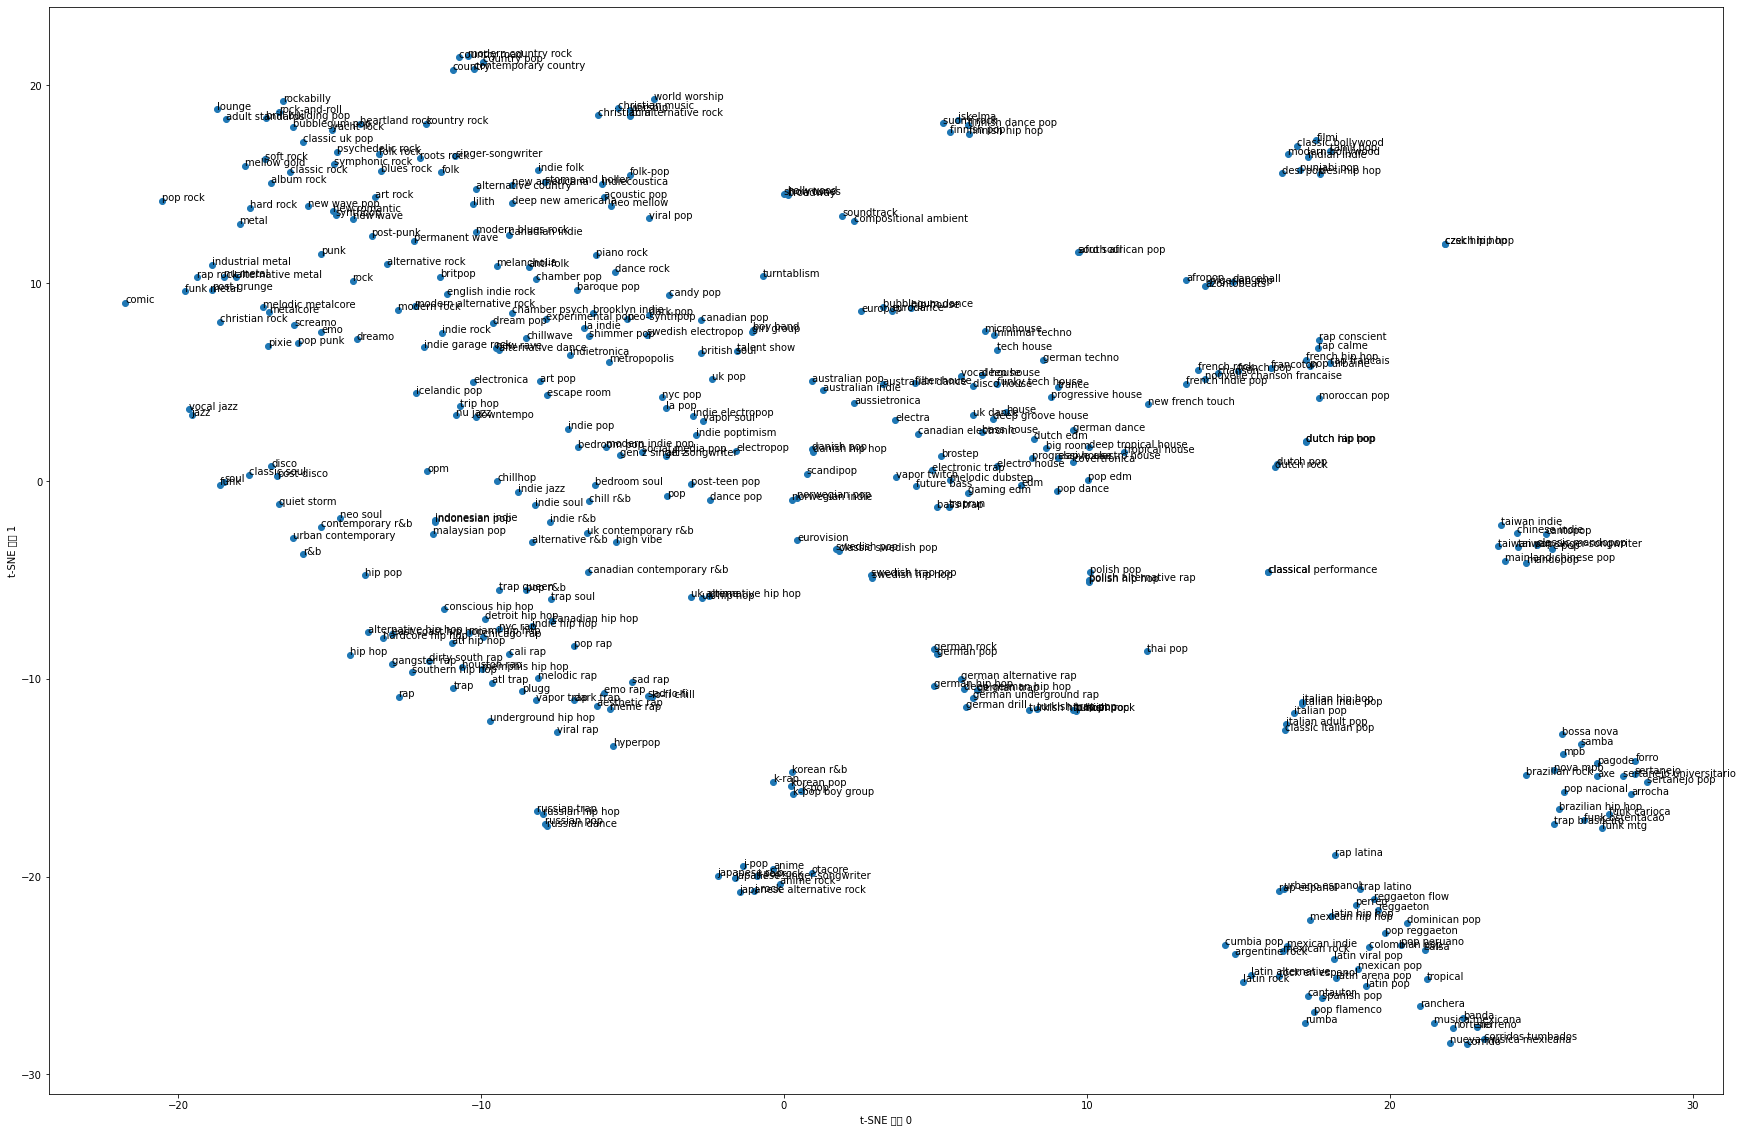

In [10]:
# word vector 시각화
X = wvmodel.wv[vocab]
size = 400
X_show = X[:size, :]
vocab_show = list(vocab.keys())[:size]

show_tsne(X_show, vocab_show)